### Importing Necessary Libraries

In [1]:


#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
#read the dataset and check the first five rows
data = pd.read_csv("loan.csv")
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
data.shape

(39717, 111)

### Data Cleaning

In [4]:
#Check the datatypes of all the columns of the dataframe
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Missing Value Check

In [5]:
# Finding % of Null columns

null_percentage = data.isnull().sum()/len(data)*100



In [6]:
# 1. Missing Value Imputation
# Fill missing values for numerical columns with the median
for col in data.select_dtypes(include=['number']).columns:
    if data[col].isnull().any():
        print(f"Filling NaN values in column: {col}")
       

Filling NaN values in column: mths_since_last_delinq
Filling NaN values in column: mths_since_last_record
Filling NaN values in column: collections_12_mths_ex_med
Filling NaN values in column: mths_since_last_major_derog
Filling NaN values in column: annual_inc_joint
Filling NaN values in column: dti_joint
Filling NaN values in column: verification_status_joint
Filling NaN values in column: tot_coll_amt
Filling NaN values in column: tot_cur_bal
Filling NaN values in column: open_acc_6m
Filling NaN values in column: open_il_6m
Filling NaN values in column: open_il_12m
Filling NaN values in column: open_il_24m
Filling NaN values in column: mths_since_rcnt_il
Filling NaN values in column: total_bal_il
Filling NaN values in column: il_util
Filling NaN values in column: open_rv_12m
Filling NaN values in column: open_rv_24m
Filling NaN values in column: max_bal_bc
Filling NaN values in column: all_util
Filling NaN values in column: total_rev_hi_lim
Filling NaN values in column: inq_fi
Fillin

In [7]:
# finding Null percentage more than 30% for each column

column_list = null_percentage[null_percentage>=30]
print(column_list)


desc                               32.585543
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi    

In [8]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
# considering the columns with less than 30% null values

data = data[data.columns[data.isnull().mean() < 0.3]]                     

In [11]:
data.shape # (39717, 54)   

(39717, 53)

### Missing Value Imputation

### Numerical

In [12]:


# Fill missing values for numerical columns with the median
for col in data.select_dtypes(include=['number']).columns:
    if data[col].isnull().any():
        print(f"Filling NaN values in column: {col}")
        data[col].fillna(data[col].median(), inplace=True)

Filling NaN values in column: collections_12_mths_ex_med
Filling NaN values in column: chargeoff_within_12_mths
Filling NaN values in column: pub_rec_bankruptcies
Filling NaN values in column: tax_liens


In [13]:

data.isnull().sum()
# below shows, the columns which appeared null values for number data type columns are now showing 0. 
# This means imputation happened successfuly for numerical columns  
    

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

### Categorical

In [14]:
# Fill missing values for categorical columns with the mode
for col in data.select_dtypes(include=['object']).columns:
    if data[col].isnull().any():
        print(f"Filling NaN values in column: {col}")
        data[col].fillna(data[col].mode()[0], inplace=True)


Filling NaN values in column: emp_title
Filling NaN values in column: emp_length
Filling NaN values in column: title
Filling NaN values in column: revol_util
Filling NaN values in column: last_pymnt_d
Filling NaN values in column: last_credit_pull_d


In [15]:
data.isnull().sum()
# below shows, the columns which appeared null values for categorical data type columns are now showing 0. 
# This means imputation happened successfuly for categorical columns  replacing with mode. 

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

### Handling Incorrect Data Types 

In [16]:
#Check the datatypes of all the columns 
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [17]:
print(data.columns)
data.shape

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


(39717, 53)

In [18]:
data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [19]:
# We are only interested in Charged off and Fully Paid classes. Removing the current loans

data = data[~(data['loan_status'] == 'Current')]
data.shape



(38577, 53)

In [20]:
# looking for other columns
data['annual_inc'].value_counts

<bound method IndexOpsMixin.value_counts of 0         24000.0
1         30000.0
2         12252.0
3         49200.0
5         36000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 38577, dtype: float64>

In [21]:
data['int_rate'].head()
#Removing %
data['int_rate'] = data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
data['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

<Axes: >

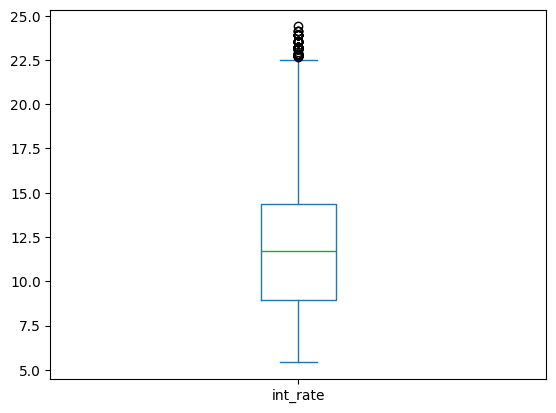

In [22]:
data['int_rate'].plot.box()

In [23]:
# Proceeding with other columns
data['home_ownership'].value_counts()


home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [24]:
data['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [25]:
data['purpose'].value_counts()  

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [26]:
data['out_prncp'].value_counts


<bound method IndexOpsMixin.value_counts of 0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: out_prncp, Length: 38577, dtype: float64>

In [27]:
data.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
5      1075269    1311441       5000         5000           5000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months     10.65       162.87     B

In [28]:
loan_status_percent = data['loan_status'].value_counts(normalize=True)
loan_status_percent

loan_status
Fully Paid     0.854136
Charged Off    0.145864
Name: proportion, dtype: float64

In [29]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
data['loan_status_num'] = data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

data.head

<bound method NDFrame.head of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
5      1075269    1311441       5000         5000           5000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term  int_rate  installment grade sub_grade  ...  \
0       36 months     10.65       162.87     B        B2  ...   

### Outliers Analysis Using Boxplot

In [30]:
# here are some of the global settings/constants that will be referred to within the functions defined below

sns.set(style='whitegrid')
by = 'loan_status'
order = ['Fully Paid','Charged Off']

# loan_status_pct from above will be used in the below functions as well

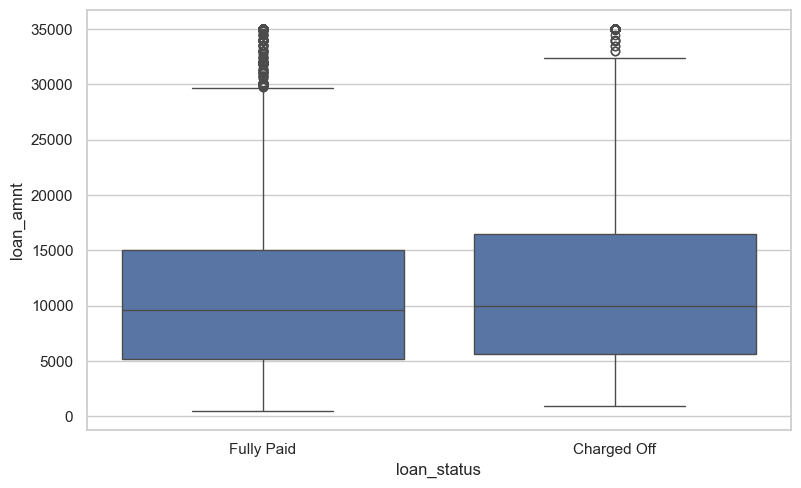

In [31]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = data)
plt.show()

In [32]:
data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [33]:
# since we see there is huge difference between mean and median . let us limit our data to 75% to remove outliers

loan_till75 = data.loc[(data['loan_amnt']<=15000)]

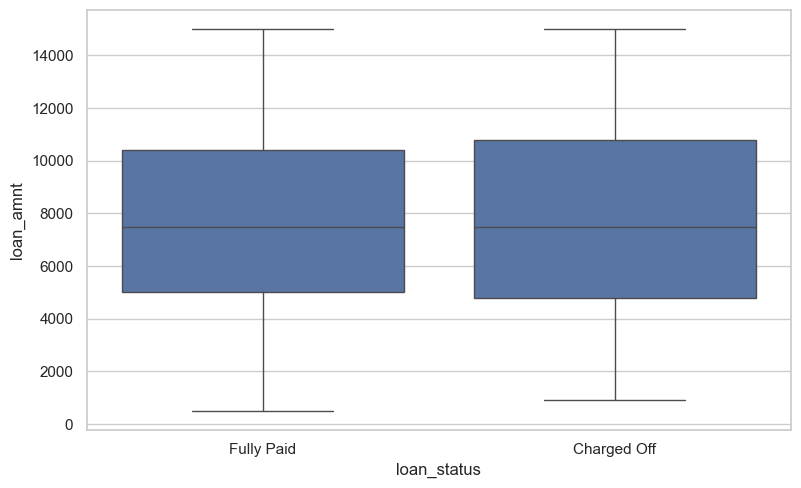

In [34]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till75)
plt.show()

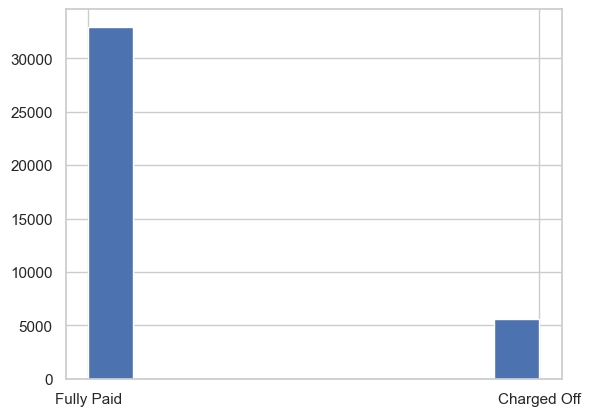

In [35]:
#Create a histogram of the loan status

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist
plt.hist(data.loan_status)
plt.show()

In [36]:
# Identify columns of type 'object'
object_columns = data.select_dtypes(include=['object']).columns

# Convert object columns to integers
for col in object_columns:
    # If the column can be directly converted to integers
    try:
        print("I am in try")
        data[col] = data[col].astype(int)
    except ValueError:
        # If the column contains non-numeric data, you may need to encode it
        print("I am here in else", data[col])
        data[col] = pd.factorize(data[col])[0]

I am in try
I am here in else 0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38577, dtype: object
I am in try
I am here in else 0        B
1        C
2        C
3        C
5        A
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 38577, dtype: object
I am in try
I am here in else 0        B2
1        C4
2        C5
3        C1
5        A4
         ..
39712    A4
39713    C1
39714    A4
39715    A2
39716    E2
Name: sub_grade, Length: 38577, dtype: object
I am in try
I am here in else 0                           US Army
1                             Ryder
2                           US Army
3               AIR RESOURCES BOARD
5              Veolia Transportaton
                    ...            
39712               FiSite Research
39713    Squarewave Soluti

### Univariate Analysis

Text(0.5, 1.0, 'Distribution of Loan status')

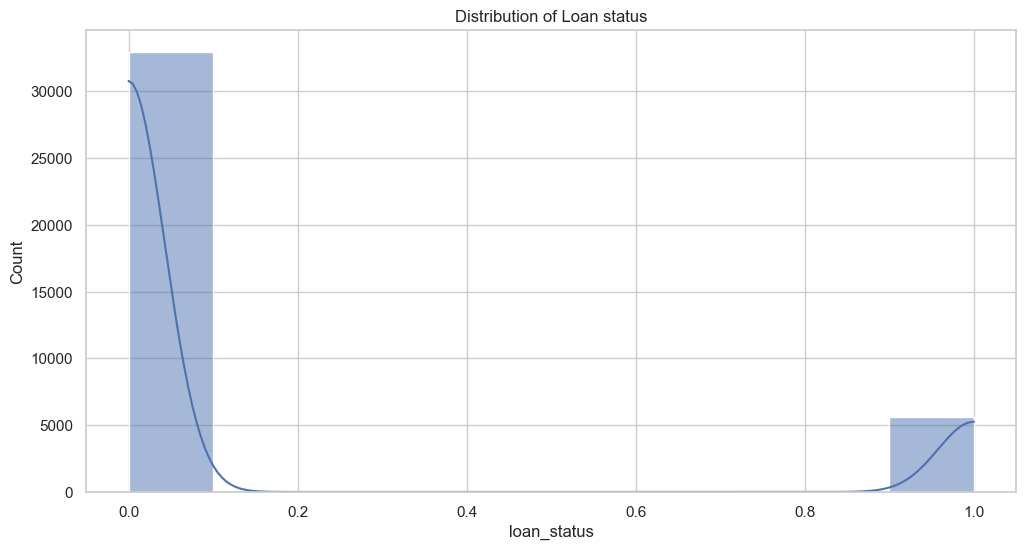

In [64]:

plt.figure(figsize=(12, 6))

# Histogram for loan_amnt
plt.subplot(1, 1, 1)
sns.histplot(data['loan_status'], kde=True, bins=10)
plt.title('Distribution of Loan status')


Text(0.5, 1.0, 'Distribution of Total Payment')

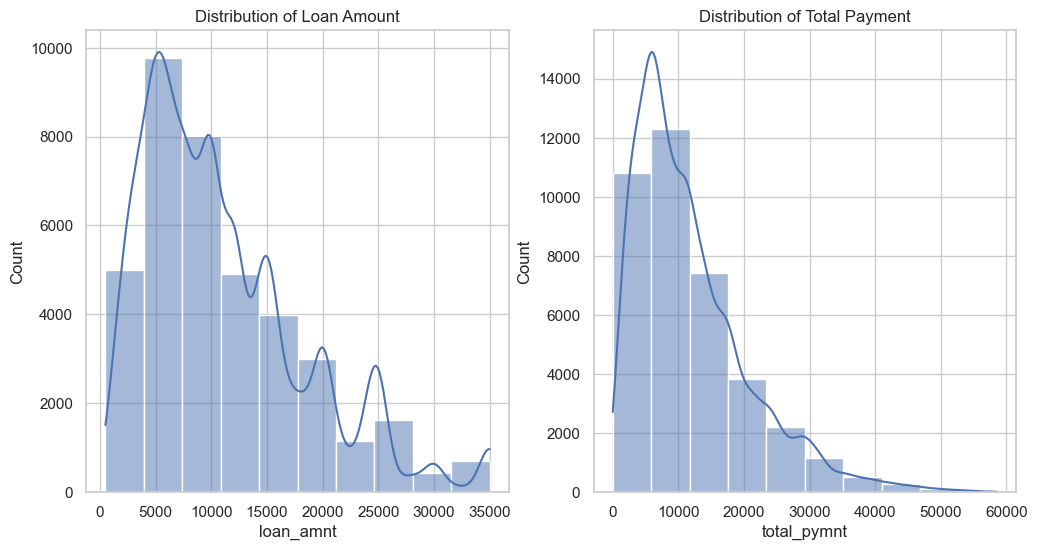

In [65]:


plt.figure(figsize=(12, 6))

# Histogram for loan_amnt
plt.subplot(1, 2, 1)
sns.histplot(data['loan_amnt'], kde=True, bins=10)
plt.title('Distribution of Loan Amount')

# Histogram for total_pymnt
plt.subplot(1, 2, 2)
sns.histplot(data['total_pymnt'], kde=True, bins=10)
plt.title('Distribution of Total Payment')



Text(0.5, 1.0, 'Interest Rate')

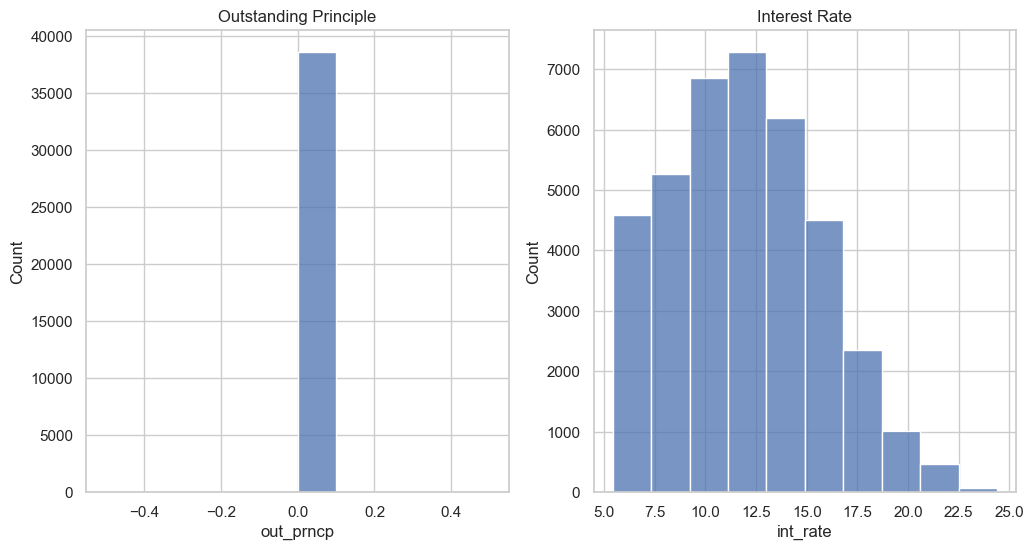

In [66]:
# Univariate Analysis
plt.figure(figsize=(12, 6))

# Histogram for Outstanding principle

plt.subplot(1, 2, 1)
sns.histplot(x='out_prncp', data=data, bins=10)
plt.title('Outstanding Principle')

# Histogram for Interest Rate
plt.subplot(1, 2, 2)
sns.histplot(x='int_rate', data=data, bins=10)
plt.title('Interest Rate')



Text(0.5, 1.0, 'Grade')

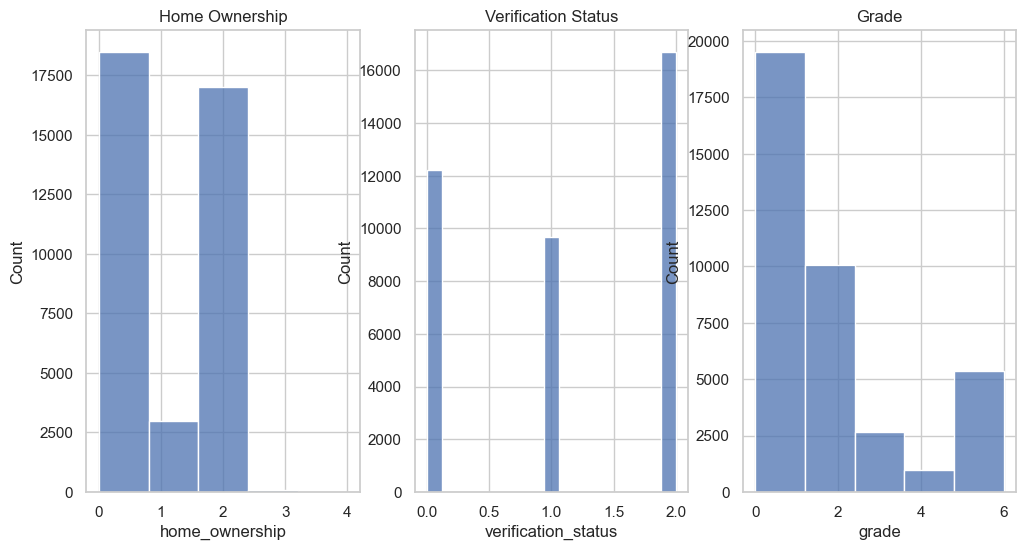

In [67]:


# Univariate Analysis
plt.figure(figsize=(12, 6))


# Histogram for Home Ownership
plt.subplot(1, 3, 1)
sns.histplot(x='home_ownership', data=data, bins=5)
plt.title('Home Ownership')

# Histogramfor Home Ownership
plt.subplot(1, 3, 2)
sns.histplot(x='verification_status', data=data, )
plt.title('Verification Status')


# Histogram for Outstanding principle

plt.subplot(1, 3, 3)
sns.histplot(x='grade', data=data, bins=5)
plt.title('Grade')


With above histogram plots, below is the inference:

1. Interest Rate: Higher interest rates seem to be a good indicator of potential defaults. Borrowers with rates above 15% are more likely to default.
2. Home Ownership: Renters and those with mortgages may have a higher default rate, as outright homeowners generally have more financial stability.
3. Verification Status: Loans that are unverified may correspond to higher risk and could signal potential defaulters.
4. Higher grades (5 and 6) are more likely to lead to defaults due to higher credit risk associated with borrowers in these categories.
Lower grades (0, 1, 2) represent more reliable borrowers with a lower probability of default, but due to the large number of loans issued, there may still be defaults among these groups, albeit at a lower rate.

### Derived Metrics

In [68]:
# Convert annual income to monthly income
data['monthly_income'] = data['annual_inc'] / 12

# Calculate the DTI ratio
data['dti'] = (data['installment'] / data['monthly_income']) * 100

# Verify the calculation
print(data[['installment', 'annual_inc', 'monthly_income', 'dti']].head())

   installment  annual_inc  monthly_income       dti
0       162.87     24000.0          2000.0  8.143500
1        59.83     30000.0          2500.0  2.393200
2        84.33     12252.0          1021.0  8.259549
3       339.31     49200.0          4100.0  8.275854
5       156.46     36000.0          3000.0  5.215333


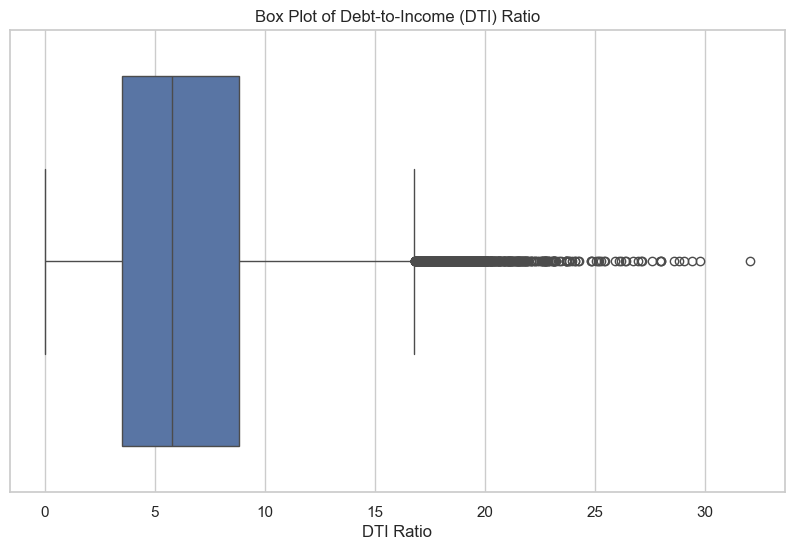

In [69]:
# Create a box plot for the DTI ratio
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['dti'])
plt.title('Box Plot of Debt-to-Income (DTI) Ratio')
plt.xlabel('DTI Ratio')
plt.show()


Borrowers with a high DTI ratio are at a greater risk of defaulting on their loans because a significant portion of their income is already committed to debt payments.
Monitoring the DTI ratio can help identify borrowers who might struggle to meet their debt obligations, allowing for proactive measures to mitigate risk. With above box plot, we can infer that anything beyond 9%

### Bivariate analysis between Loan approval and DTI

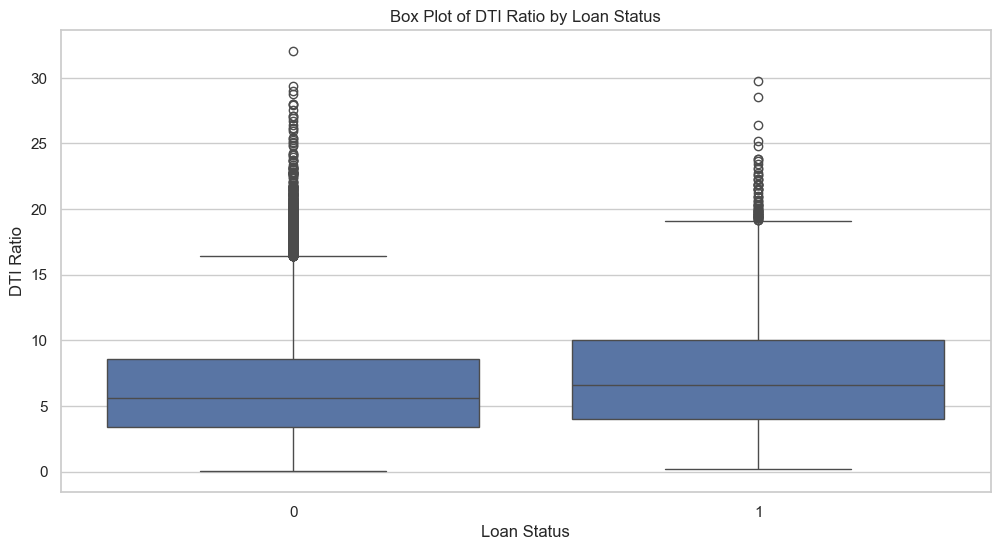

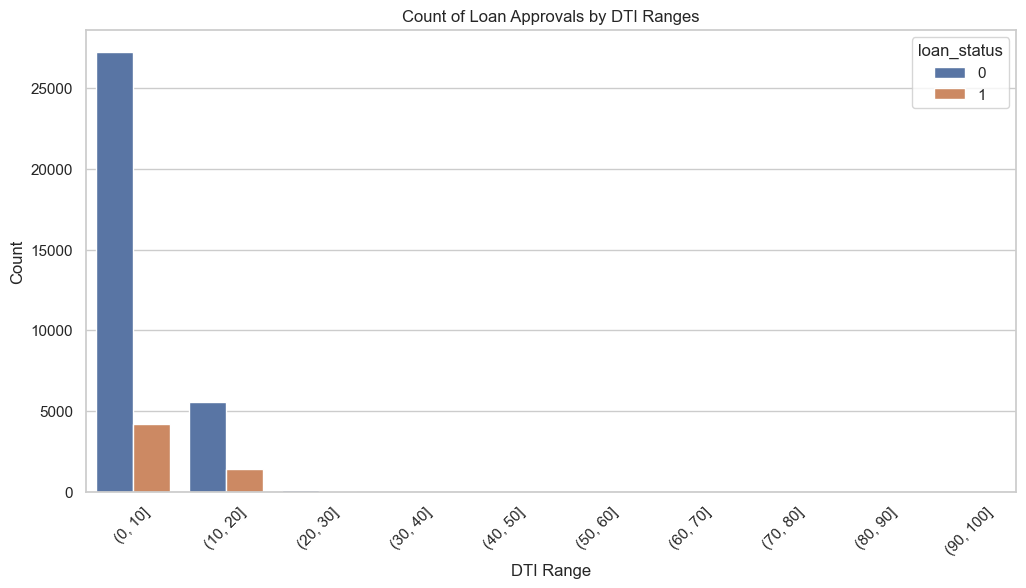

In [70]:
# Create a box plot for the DTI ratio by loan status
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='dti', data=data)
plt.title('Box Plot of DTI Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('DTI Ratio')
plt.show()

# Create a bar plot for the count of loan approvals by DTI ranges
# Define DTI ranges
data['dti_range'] = pd.cut(data['dti'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.figure(figsize=(12, 6))
sns.countplot(x='dti_range', hue='loan_status', data=data)
plt.title('Count of Loan Approvals by DTI Ranges')
plt.xlabel('DTI Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The above box plot shows that the median DTI ratio for approved loans is significantly lower than 
that for non-approved loans, it suggests that lower DTI ratios are associated with a higher likelihood of loan approval. 

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
12     1064687    1298717       9000         9000       9000.00000     0   
20     1069740    1284848      20250        20250      19142.16108     1   
29     1047704    1278806       8500         8500       8500.00000     0   
31     1069539    1304608      31825        31825      31825.00000     0   
37     1069357    1304251      15000        15000      15000.00000     0   
...        ...        ...        ...          ...              ...   ...   
39696   102376      95212      25000        25000        525.00000     0   
39697   101579     100083      10000        10000        400.00000     0   
39700    98276      98268       5400         5400        200.00000     0   
39713    90665      90607       8500         8500        875.00000     0   
39716    87023      86999       7500         7500        800.00000     0   

       int_rate  installment  grade  sub_grade  ...  policy_code  \
12        13.49    

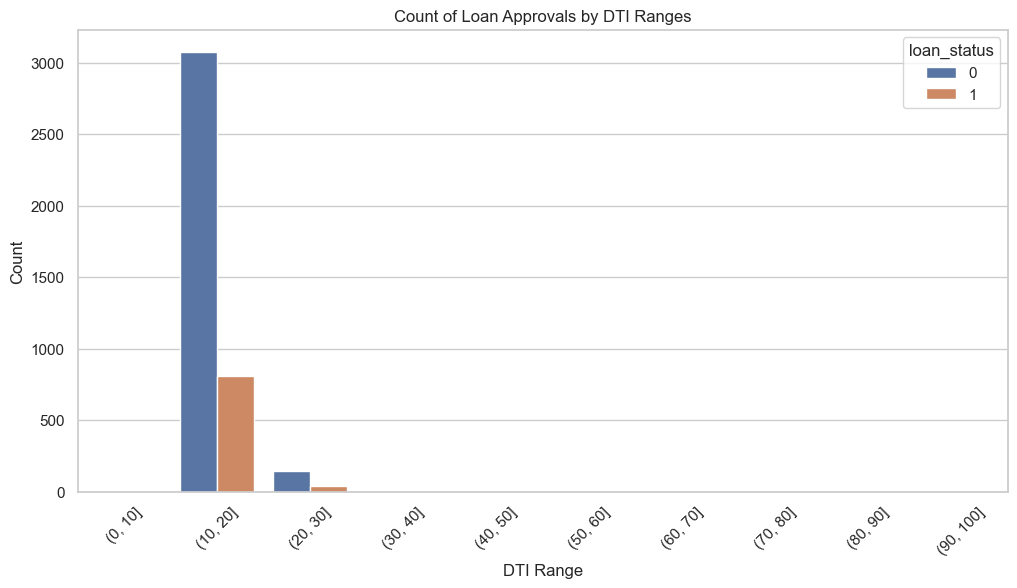

In [71]:
# Define the threshold for higher DTI range
dti_threshold = 12

# Filter the DataFrame for rows where DTI is greater than the threshold
high_dti = data[data['dti'] > dti_threshold]

# Print the filtered rows
print(high_dti)

# Create a bar plot for the count of loan approvals by DTI ranges   
plt.figure(figsize=(12, 6))
sns.countplot(x='dti_range', hue='loan_status', data=high_dti)
plt.title('Count of Loan Approvals by DTI Ranges')
plt.xlabel('DTI Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

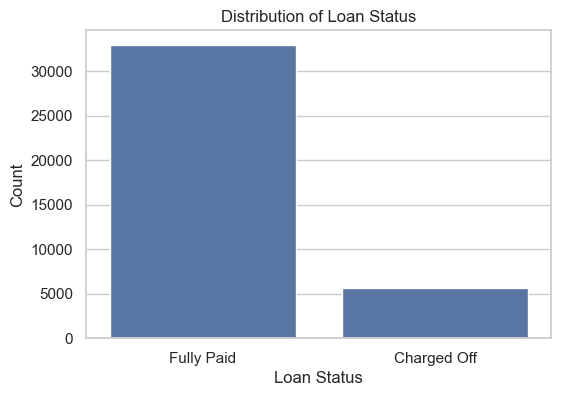

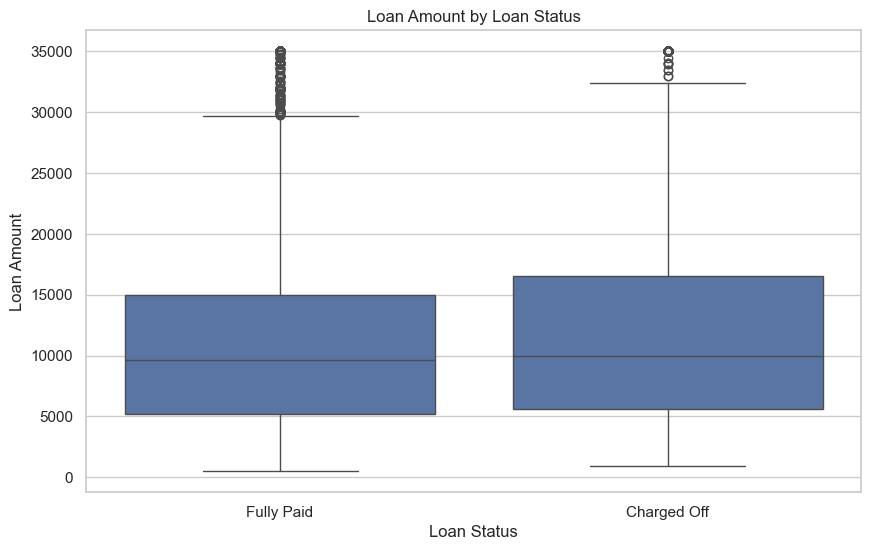

In [72]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=data)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fully Paid', 'Charged Off'])
plt.show()


# Analyze the relationship between features and the target variable
# Example: Distribution of loan amount by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks([0, 1], ['Fully Paid', 'Charged Off'])
plt.show()




### Bivariant Analysis

### Numerical 

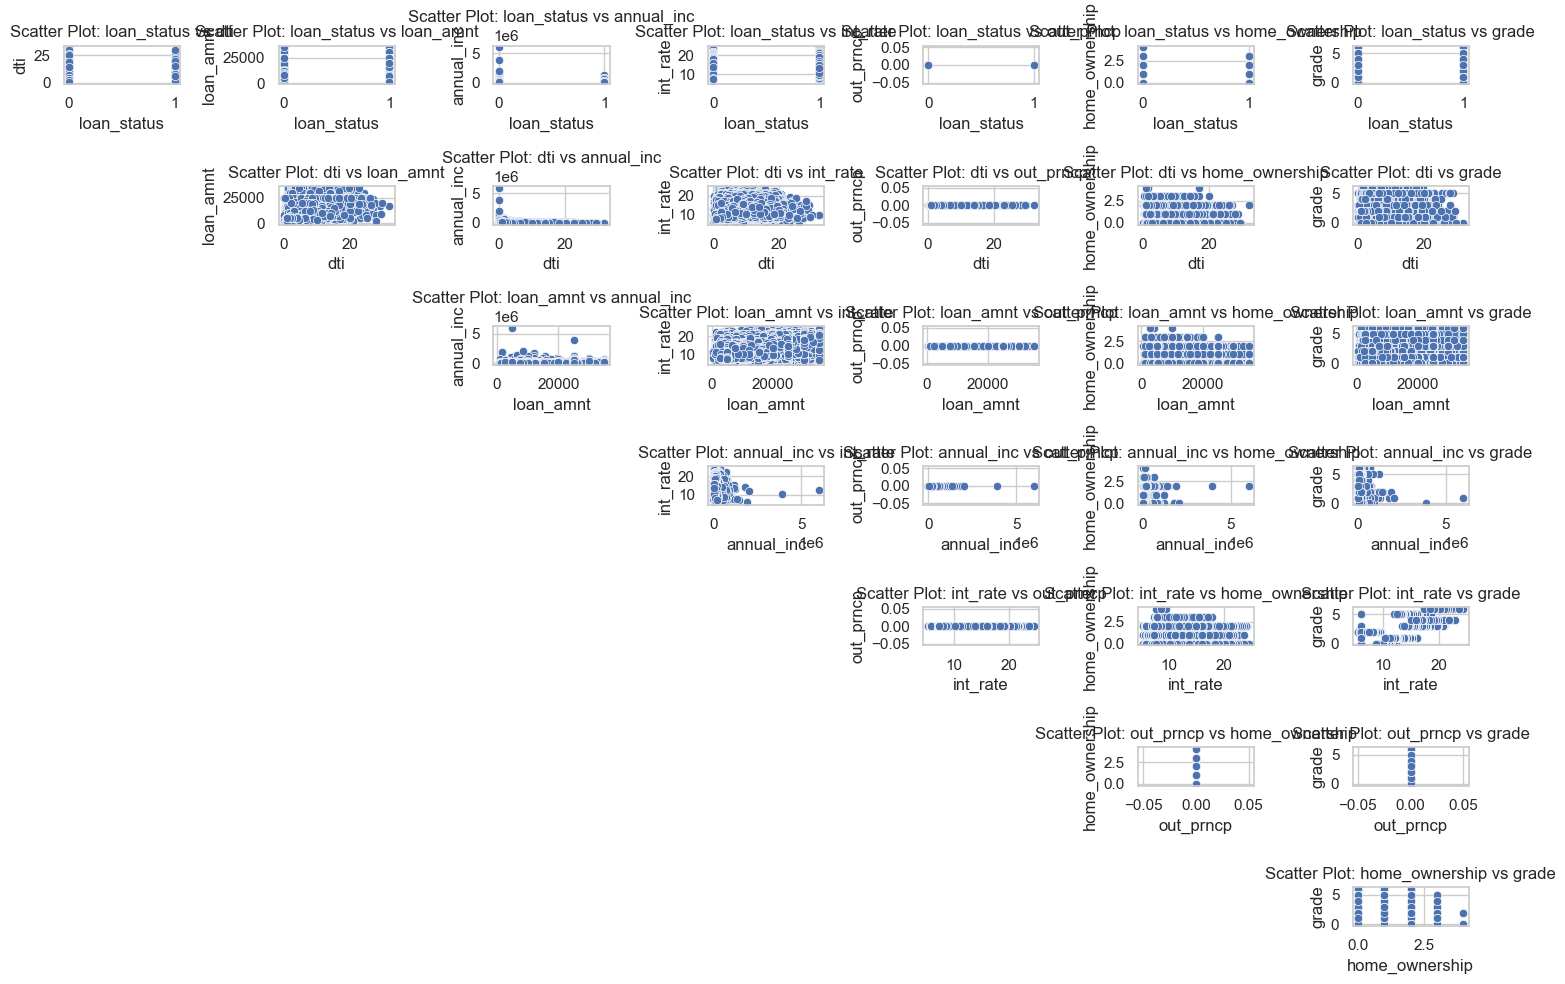

In [73]:
# List of numerical columns to analyze
numerical_columns = ['loan_status','dti', 'loan_amnt', 'annual_inc', 'int_rate',  'out_prncp', 'home_ownership', 'grade']

# Create scatter plots for each pair of numerical variables
plt.figure(figsize=(15, 10))

for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i < j:
            plt.subplot(len(numerical_columns)-1, len(numerical_columns)-1, i*(len(numerical_columns)-1) + j)
            sns.scatterplot(x=data[col1], y=data[col2])
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'Scatter Plot: {col1} vs {col2}')

plt.tight_layout()
plt.show()

This analysis suggests that lenders focus on financial indicators, such as annual income and DTI, to assess a borrower’s risk. Those with stronger financial profiles (higher income, lower debt) are offered more favorable loan terms, while borrowers deemed riskier (lower income, higher debt) are charged higher interest rates. The data indicates that home ownership status has little impact on these decisions, with lenders more concerned about a borrower’s ability to manage debt.

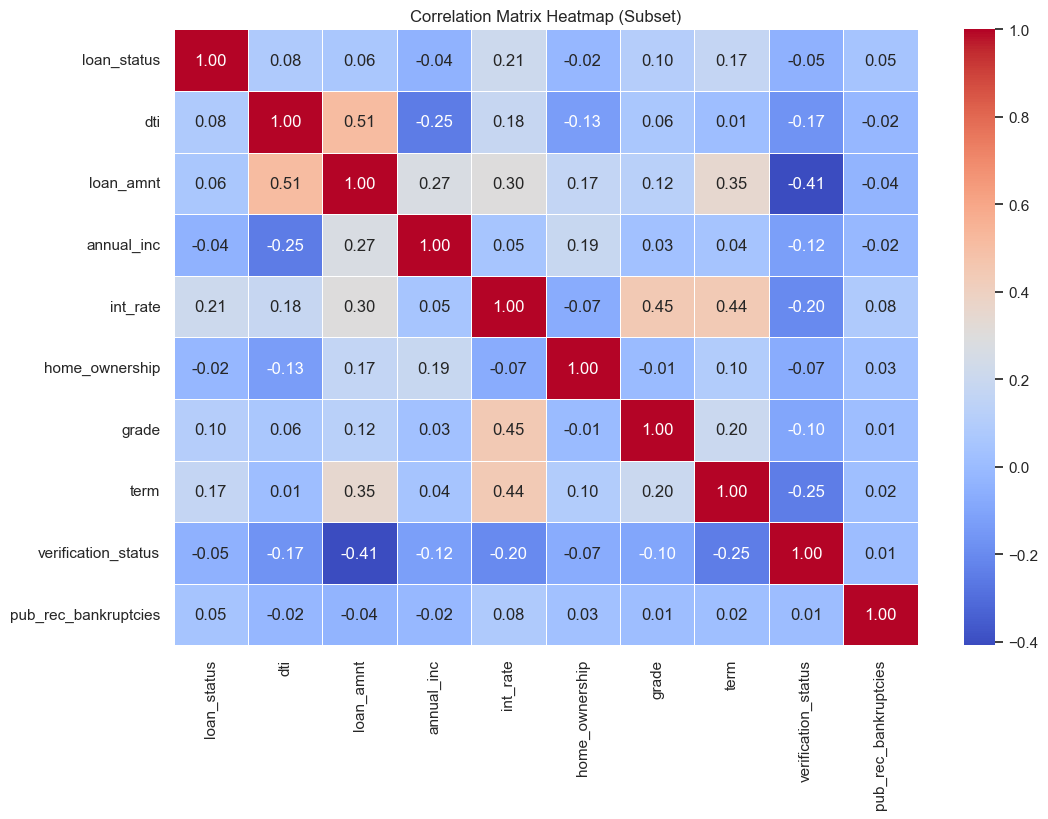

In [74]:

# Convert categorical columns to numerical values
data_numerical = pd.get_dummies(data)

# Calculate correlation coefficients for numerical features
correlation_matrix = data_numerical.corr()

# Select a subset of columns for the heatmap
columns_subset = ['loan_status', 'dti', 'loan_amnt', 'annual_inc', 'int_rate', 'home_ownership', 'grade', 'term', 'verification_status', 'pub_rec_bankruptcies']
# Replace with your column names
correlation_matrix_subset = correlation_matrix.loc[columns_subset, columns_subset]
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_subset, dtype=bool))


# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Subset)')
plt.show()


Conclusion:

1.Interest Rate (int_rate): Higher interest rates are linked to an increased likelihood of default.

2.Grade: Lower loan grades (indicating higher risk) are associated with more defaults.

3.Home ownership (home_ownership) status has little impact on these decisions

4.Outstanding Principal (out_prncp): Higher outstanding principal correlates with a greater risk of default.



Derived metrics:

1.Debt-to-Income Ratio (dti): Borrowers with higher debt-to-income ratios are more prone to default.



